In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.20.1 scipy==1.6.1 pandas==1.2.2 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0


In [3]:
results_file = '/mnt/d/Yoshihara/DRY/210305/scanpy.h5ad' 

In [4]:
adata = sc.read_10x_mtx(
    'outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 

... reading from cache file cache/outs-filtered_feature_bc_matrix-matrix.h5ad


In [5]:
adata

AnnData object with n_obs × n_vars = 8862 × 32285
    var: 'gene_ids', 'feature_types'

In [6]:
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


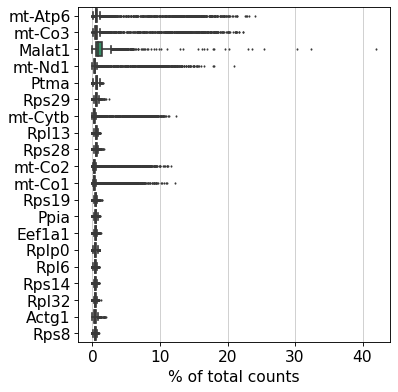

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 121 cells that have less than 200 genes expressed
filtered out 12077 genes that are detected in less than 3 cells


In [9]:
adata

AnnData object with n_obs × n_vars = 8741 × 20208
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [10]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'feature_types' as categorical


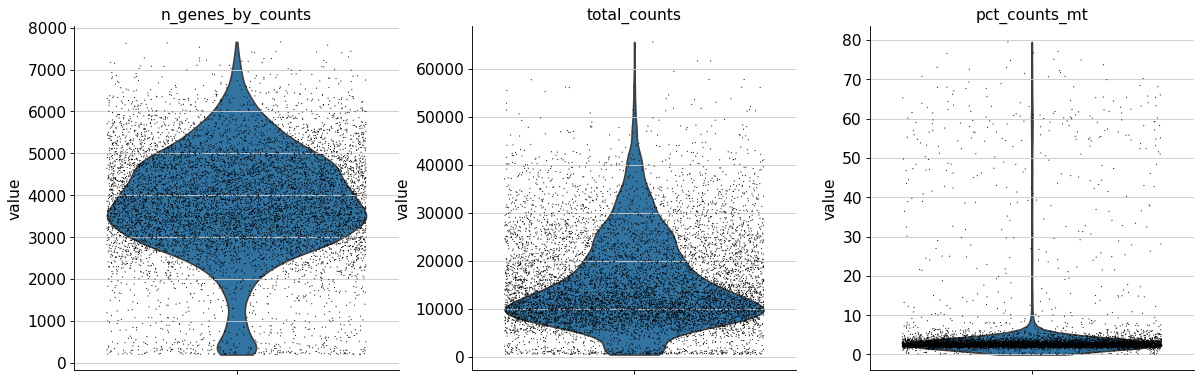

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

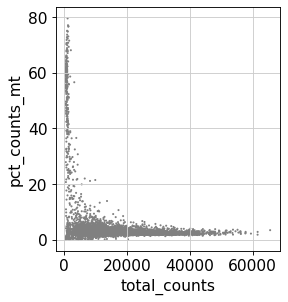

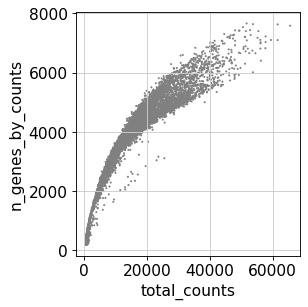

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [13]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [14]:
adata

View of AnnData object with n_obs × n_vars = 8087 × 20208
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

/home/analysis/miniconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


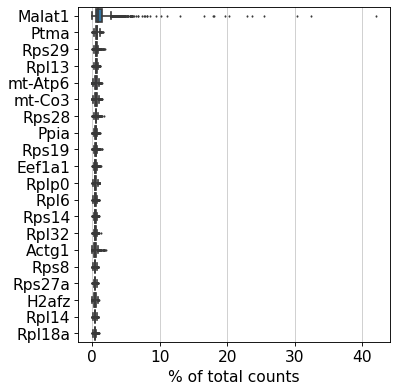

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [17]:
sc.pp.log1p(adata)

In [18]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:28)


KeyError: 'Could not find key Nestin in .var_names or .obs.columns.'

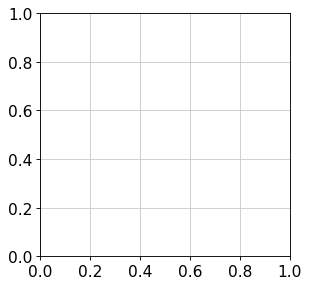

In [19]:
#sc.pl.pca(adata, color='Nestin')

In [ ]:
#sc.pl.pca(adata, color='NES')

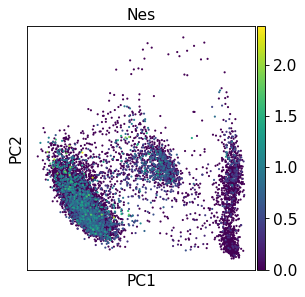

In [20]:
sc.pl.pca(adata, color='Nes')

In [ ]:
#sc.tl.umap(adata)
#sc.pl.umap(adata, color='Nes')

In [ ]:
#tl.paga(adata)
#pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#tl.umap(adata, init_pos='paga')

In [21]:
from scanpy import tools as tl

In [ ]:
#tl.paga(adata)
#pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#tl.umap(adata, init_pos='paga')

In [ ]:
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

In [ ]:
#tl.paga(adata)
#pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
#tl.umap(adata, init_pos='paga')

In [ ]:
adata.write(results_file)

In [ ]:
#sc.tl.leiden(adata)

In [ ]:
#sc.tl.louvain(adata)

In [ ]:
#sc.tl.umap(adata)
#sc.pl.umap(adata, color='Nes')

In [22]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


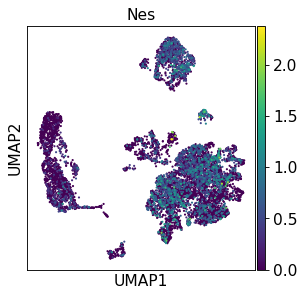

In [23]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='Nes')

In [ ]:
#sc.tl.louvain(adata)

In [24]:
import igraph

In [ ]:
#from igraph import *

In [ ]:
#import sys
#import pprint
#pprint.pprint(sys.path)

In [25]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 22 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


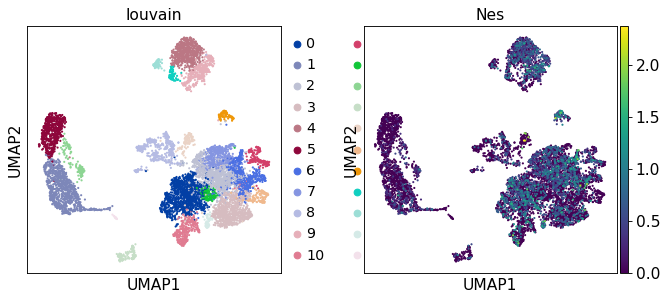

In [27]:
sc.pl.umap(adata, color=['louvain','Nes'])

In [28]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


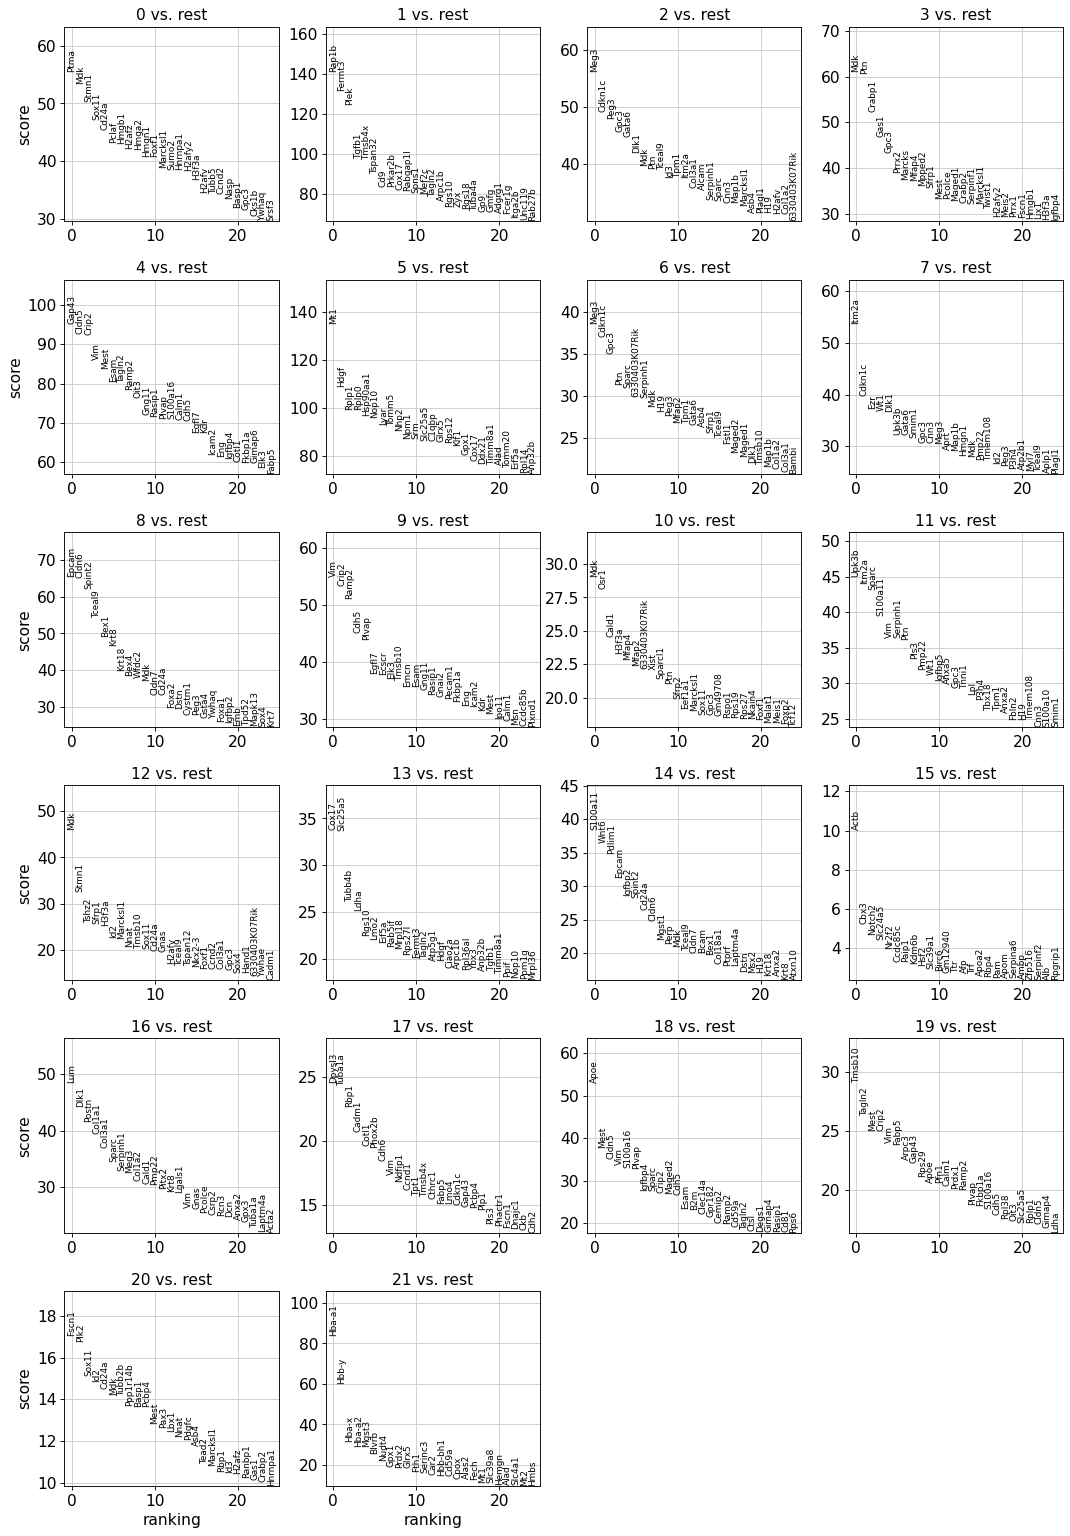

In [29]:
#T-Test
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [30]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(25)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Ptma,Rap1b,Meg3,Mdk,Gap43,Mt1,Meg3,Itm2a,Epcam,Vim,...,Mdk,Cox17,S100a11,Actb,Lum,Dpysl3,Apoe,Tmsb10,Fscn1,Hba-a1
1,Mdk,Fermt3,Cdkn1c,Ptn,Cldn5,Hdgf,Cdkn1c,Cdkn1c,Cldn6,Crip2,...,Stmn1,Slc25a5,Wnt6,Cbx3,Dlk1,Tuba1a,Mest,Tagln2,Plk2,Hbb-y
2,Stmn1,Plek,Peg3,Crabp1,Crip2,Rplp1,Gpc3,Ezr,Spint2,Ramp2,...,Tshz2,Tubb4b,Pdlim1,Notch2,Postn,Rbp1,Cldn5,Mest,Sox11,Hba-x
3,Sox11,Tgfb1,Gpc3,Gas1,Vim,Rplp0,Ptn,Wt1,Tceal9,Cdh5,...,Sfrp1,Ldha,Epcam,Slc24a5,Col1a1,Cadm1,Vim,Crip2,Id2,Hba-a2
4,Cd24a,Tmsb4x,Gata6,Gpc3,Mest,Hsp90aa1,Sparc,Dlk1,Bex1,Plvap,...,H3f3a,Rgs10,Igfbp2,Nr2f2,Col3a1,Cotl1,S100a16,Vim,Cd24a,Mgst3
5,Pclaf,Tspan32,Dlk1,Prrx2,Esam,Nop10,6330403K07Rik,Upk3b,Krt8,Egfl7,...,Id2,Lmo2,Spint2,Ccdc85c,Sparc,Phox2b,Plvap,Fabp5,Mdk,Blvrb
6,Hmgb1,Cd9,Mdk,Marcks,Tagln2,Lyar,Serpinh1,Gata6,Krt18,Ecscr,...,Marcksl1,Eif5a,Cd24a,Paip1,Serpinh1,Cdh6,Igfbp4,Arpc3,Tubb2b,Nudt4
7,H2afz,Prkar2b,Ptn,Mfap4,Ramp2,Tomm5,Mdk,Smim1,Bex4,Elk3,...,Nnat,Rab5if,Cldn6,Kdm6b,Meg3,Vim,Sparc,Gap43,Ppp1r14b,Gpx1
8,Hmga2,Cox17,Tceal9,Mpped2,Oit3,Nhp2,H19,Gpc3,Wfdc2,Tmsb10,...,Tmsb10,Mrpl18,Mgst1,Hsf2,Col1a2,Ndfip1,Crip2,Rps29,Basp1,Prdx2
9,Hmgn1,Rabgap1l,Id3,Sfrp1,Gng11,Npm1,Peg3,Cnn3,Mdk,Emcn,...,Sox11,Rps27l,Perp,Slc39a1,Cald1,Ccnd1,Maged2,Apoe,Pcbp4,Glrx5


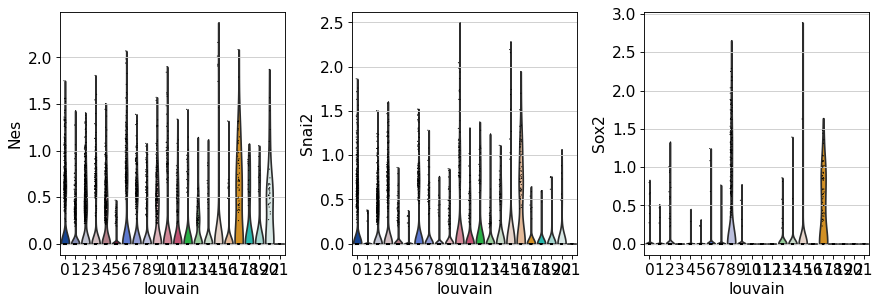

In [32]:
sc.pl.violin(adata, ['Nes','Snai2','Sox2'], groupby='louvain')

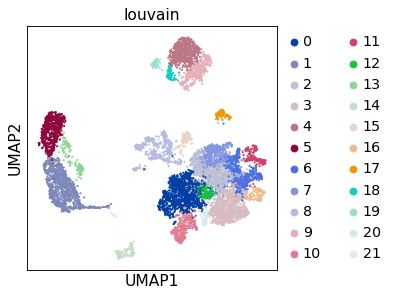

In [33]:
sc.pl.umap(adata, color='louvain')

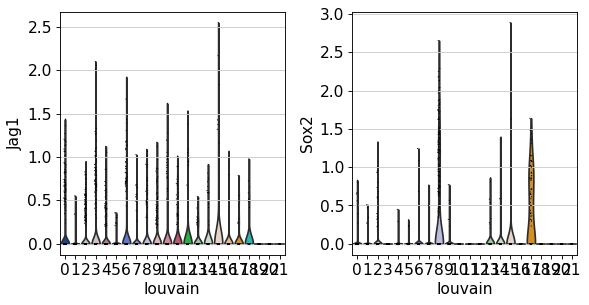

In [34]:
sc.pl.violin(adata, ['Jag1','Sox2'], groupby='louvain')